# Forum pageviews (Time Series Analysis)

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part I : Data Prepareation

In [2]:
# load dataset using pd.read_csv()

series = pd.read_csv('forum-pageviews.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Dates
2016-05-09     1201
2016-05-10     2329
2016-05-11     1716
2016-05-12    10539
2016-05-13     6933
Name: value, dtype: int64


### Load Time Series Data

In [3]:
# Descriptive statistics

series.describe()

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64

### Explore Time Series Data

In [4]:
# peak at the data

print(series.head(10))

Dates
2016-05-09     1201
2016-05-10     2329
2016-05-11     1716
2016-05-12    10539
2016-05-13     6933
2016-05-14     3127
2016-05-15     2927
2016-05-16     2591
2016-05-17     3403
2016-05-18     5410
Name: value, dtype: int64


In [5]:
# number of observaitons

print(series.size)

1304


In [6]:
# querying by time

print(series['2016-05'])

Dates
2016-05-09     1201
2016-05-10     2329
2016-05-11     1716
2016-05-12    10539
2016-05-13     6933
2016-05-14     3127
2016-05-15     2927
2016-05-16     2591
2016-05-17     3403
2016-05-18     5410
2016-05-19    19736
2016-05-20    17491
2016-05-21    13370
2016-05-22    13158
2016-05-23    13887
2016-05-24    15336
2016-05-25    14779
2016-05-26    18060
2016-05-27    19997
2016-05-28    19044
2016-05-29    20325
2016-05-30    16607
2016-05-31    16616
Name: value, dtype: int64


In [7]:
# descriptive statistics

print(series.describe())

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64


## Part II: Basic Feature Engineering

### Date Time Features

In [8]:
# create date time features of a dataset

dataframe = pd.DataFrame()

dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['value'] = [series[i] for i in range(len(series))]
print(dataframe.head(5))

   month  day  value
0      5    9   1201
1      5   10   2329
2      5   11   1716
3      5   12  10539
4      5   13   6933


### Lag Features

In [9]:
# create a lag features

pageviews = pd.DataFrame(series.values)
dataframe = pd.concat([pageviews.shift(1), pageviews], axis = 1)
dataframe.columns = ['p', 'p+1']
print(dataframe.head(5))

         p    p+1
0      NaN   1201
1   1201.0   2329
2   2329.0   1716
3   1716.0  10539
4  10539.0   6933


In [10]:
# create lag feature with (include more lag features)

pageviews = pd.DataFrame(series.values)
dataframe = pd.concat([pageviews.shift(3), pageviews.shift(2), pageviews.shift(1), pageviews], axis = 1)
dataframe.columns = ['p-2', 't-1', 't', 't+1']
print(dataframe.head(5))

      p-2     t-1        t    t+1
0     NaN     NaN      NaN   1201
1     NaN     NaN   1201.0   2329
2     NaN  1201.0   2329.0   1716
3  1201.0  2329.0   1716.0  10539
4  2329.0  1716.0  10539.0   6933


### Rolling Window Statistics

In [11]:
# create a rolling mean

pageview = pd.DataFrame(series.values)
shifted = pageviews.shift(1)
window = shifted.rolling(window = 2 )
means = window.mean()
dataframe = pd.concat([means, pageviews], axis = 1)
dataframe.columns = ['mean(p-1, p)', 'p+1']
print(dataframe.head(5))

   mean(p-1, p)    p+1
0           NaN   1201
1           NaN   2329
2        1765.0   1716
3        2022.5  10539
4        6127.5   6933


In [12]:
# create rolling statistics features (with statistics)

pageviews = pd.DataFrame(series.values)
width = 3
shifted = pageview.shift(width - 1)
window = shifted.rolling(window = width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), pageviews], axis = 1)
dataframe.columns = ['min', 'mean', 'max', 'p+1']
print(dataframe.head(5))

      min         mean     max    p+1
0     NaN          NaN     NaN   1201
1     NaN          NaN     NaN   2329
2     NaN          NaN     NaN   1716
3     NaN          NaN     NaN  10539
4  1201.0  1748.666667  2329.0   6933


### Expanding Window Statistics

In [13]:
# create expanding window features

pageviews = pd.DataFrame(series.values)
window = pageviews.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), pageviews.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 'p+1']
print(dataframe.head(5))

      min         mean      max      p+1
0  1201.0  1201.000000   1201.0   2329.0
1  1201.0  1765.000000   2329.0   1716.0
2  1201.0  1748.666667   2329.0  10539.0
3  1201.0  3946.250000  10539.0   6933.0
4  1201.0  4543.600000  10539.0   3127.0


## Part III: Data Visualizations

### Line Plot

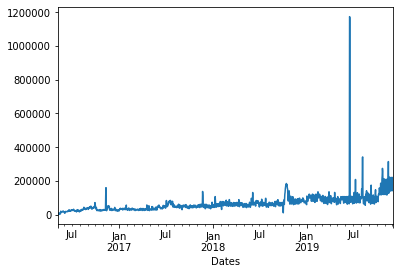

In [14]:
# create a line plot

series.plot()
plt.show()

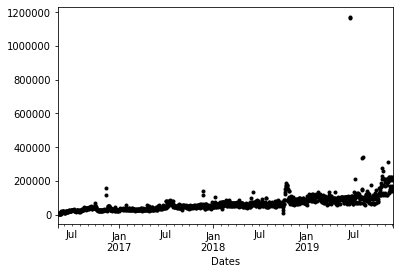

In [15]:
# create a dot plot

series.plot(style = 'k.')
plt.show()

In [16]:
# create a stacked line plots

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

ValueError: Length of values does not match length of index

### Histogram and Density Plots

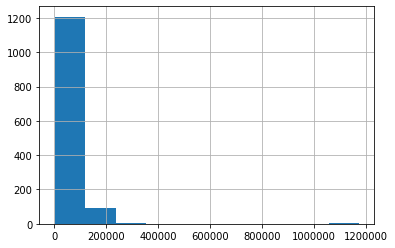

In [17]:
# create a histogram plot

series.hist()
plt.show()

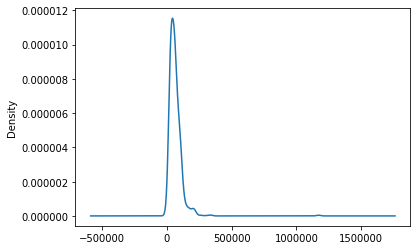

In [18]:
# create a density plot

series.plot(kind='kde')
plt.show()

### Box Whisker Plots by interval

In [19]:
groups = series.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years.boxplot()
plt.show()

ValueError: Length of values does not match length of index

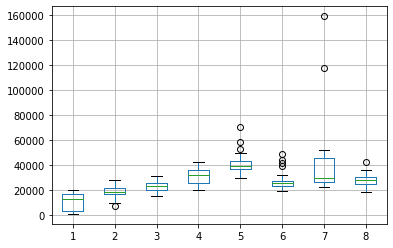

In [20]:
#  create a boxplot of monthly data

one_year = series['2016']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis = 1)
months = pd.DataFrame(months)
months.columns = range(1,9)
months.boxplot()
plt.show()

### Heat Maps

In [21]:
# create a heat map of the yearly data

groups = series.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years = years.T
plt.matshow(years, interpolation = None, aspect = 'auto')
plt.show()

ValueError: Length of values does not match length of index

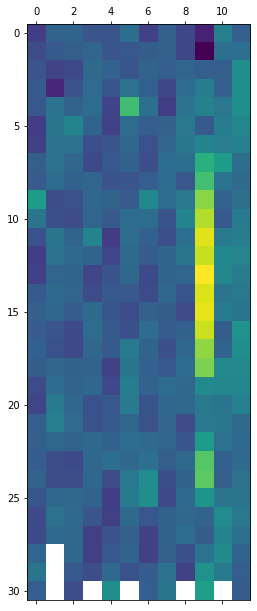

In [22]:
# create a heat map of monthly data

one_year = series['2018']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis =1)
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

### Lag Scatter Plots

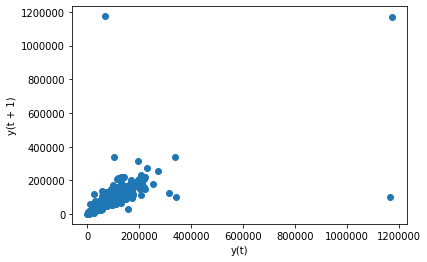

In [23]:
# create a scatter plot

pd.plotting.lag_plot(series)
plt.show()

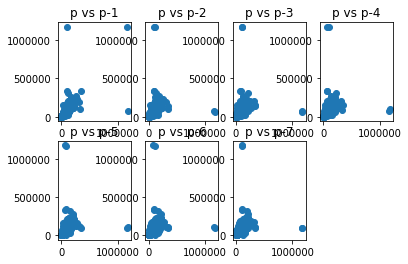

In [24]:
# create multiple scatter plots

values = pd.DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1, (lags + 1)):
    columns.append(values.shift(i))
    
dataframe = pd.concat(columns, axis = 1)
columns = ['p']

for i in range(1, (lags + 1)):
    columns.append('p-' + str(i))

dataframe.columns = columns
plt.figure(1)
        
for i in range(1, (lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('p vs p-' + str(i))
    plt.scatter(x=dataframe['p'].values, y= dataframe['p-'+str(i)].values)
    

plt.show()


### Autocorrelation Plots

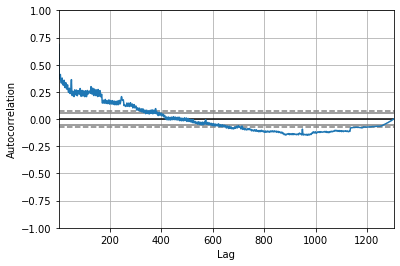

In [25]:
# create and autocorrelated plot

pd.plotting.autocorrelation_plot(series)
plt.show()

## Part IV: Resampling

### Downsampling the data

Dates
2016-05-31    11242.695652
2016-06-30    19124.366667
2016-07-31    23314.225806
2016-08-31    31049.193548
2016-09-30    41476.866667
Freq: M, Name: value, dtype: float64


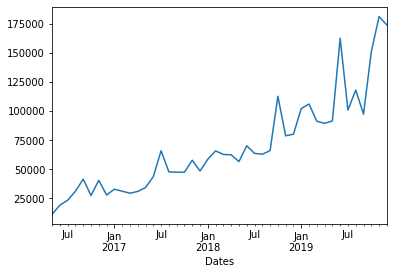

In [26]:
# downsample to monthly intervals

resample = series.resample('M')
monthly_mean_pageviews = resample.mean()
print(monthly_mean_pageviews.head())
monthly_mean_pageviews.plot()
plt.show()

Dates
2016-06-30    15704.018868
2016-09-30    31843.173913
2016-12-31    31800.130435
2017-03-31    31088.311111
2017-06-30    36211.648352
Freq: Q-DEC, Name: value, dtype: float64


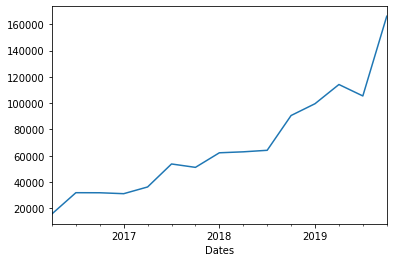

In [27]:
# downsample to quarterly intervals

resample = series.resample('Q')
quarterly_mean_pageviews = resample.mean()
print(quarterly_mean_pageviews.head())
quarterly_mean_pageviews.plot()
plt.show()

Dates
2016-12-31     6687497
2017-12-31    15736295
2018-12-31    25555815
2019-12-31    39676164
Freq: A-DEC, Name: value, dtype: int64


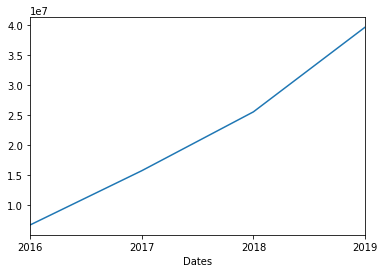

In [28]:
# downsample to yearly intervals

resample = series.resample('A')
yearly_mean_pageviews = resample.sum()
print(yearly_mean_pageviews.head())
yearly_mean_pageviews.plot()
plt.show()

## Part V: Power Transforms

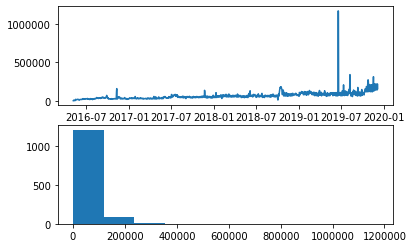

In [29]:
# plot the time series

plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)
plt.show()

## Part VI: Moving Average Smoothing

### Moving average as Data Preparation

Dates
2016-05-09            NaN
2016-05-10            NaN
2016-05-11    1748.666667
2016-05-12    4861.333333
2016-05-13    6396.000000
2016-05-14    6866.333333
2016-05-15    4329.000000
2016-05-16    2881.666667
2016-05-17    2973.666667
2016-05-18    3801.333333
Name: value, dtype: float64


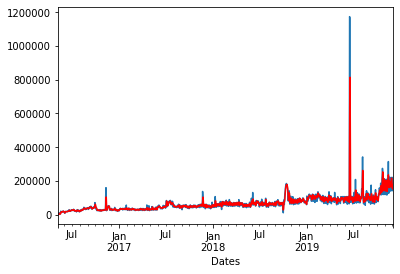

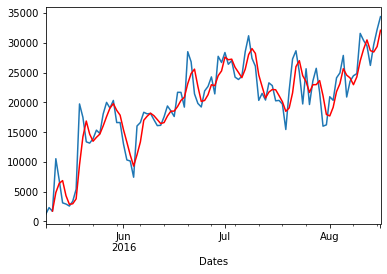

In [30]:
# nmoving average smooting as data preparation

# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

# zoomed plot original and transformde dataset

series[:100].plot()
rolling_mean[:100].plot(color='red')
plt.show()

### Moving average as Feature Engineering

In [38]:
# moving average smoothing as feature engineering

df = pd.DataFrame(series.values)
width = 3
lagi = df.shift(1)
lag3 = df.shift(width - 1)
window  = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lagi, df], axis = 1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

          mean        t    t+1
0          NaN      NaN   1201
1          NaN   1201.0   2329
2          NaN   2329.0   1716
3          NaN   1716.0  10539
4  1748.666667  10539.0   6933
5  4861.333333   6933.0   3127
6  6396.000000   3127.0   2927
7  6866.333333   2927.0   2591
8  4329.000000   2591.0   3403
9  2881.666667   3403.0   5410


### Moving average as Prediction

predicted=1748.666667, expected=10539.000000
predicted=4861.333333, expected=6933.000000
predicted=6396.000000, expected=3127.000000
predicted=6866.333333, expected=2927.000000
predicted=4329.000000, expected=2591.000000
predicted=2881.666667, expected=3403.000000
predicted=2973.666667, expected=5410.000000
predicted=3801.333333, expected=19736.000000
predicted=9516.333333, expected=17491.000000
predicted=14212.333333, expected=13370.000000
predicted=16865.666667, expected=13158.000000
predicted=14673.000000, expected=13887.000000
predicted=13471.666667, expected=15336.000000
predicted=14127.000000, expected=14779.000000
predicted=14667.333333, expected=18060.000000
predicted=16058.333333, expected=19997.000000
predicted=17612.000000, expected=19044.000000
predicted=19033.666667, expected=20325.000000
predicted=19788.666667, expected=16607.000000
predicted=18658.666667, expected=16616.000000
predicted=17849.333333, expected=13007.000000
predicted=15410.000000, expected=10329.000000
pre

predicted=99511.666667, expected=113353.000000
predicted=105712.333333, expected=134753.000000
predicted=115174.666667, expected=83480.000000
predicted=110528.666667, expected=71121.000000
predicted=96451.333333, expected=98719.000000
predicted=84440.000000, expected=93282.000000
predicted=87707.333333, expected=98107.000000
predicted=96702.666667, expected=112045.000000
predicted=101144.666667, expected=110418.000000
predicted=106856.666667, expected=80815.000000
predicted=101092.666667, expected=64028.000000
predicted=85087.000000, expected=89370.000000
predicted=78071.000000, expected=92505.000000
predicted=81967.666667, expected=92153.000000
predicted=91342.666667, expected=97584.000000
predicted=94080.666667, expected=92058.000000
predicted=93931.666667, expected=93224.000000
predicted=94288.666667, expected=75554.000000
predicted=86945.333333, expected=92015.000000
predicted=86931.000000, expected=98066.000000
predicted=88545.000000, expected=100099.000000
predicted=96726.666667,

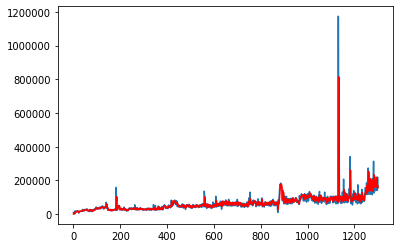

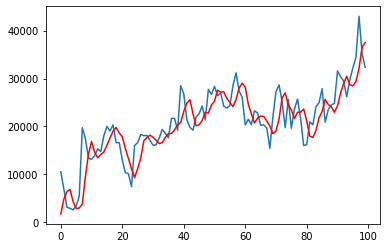

In [43]:
# moving average smoothing as a forecast model

# Note that here we assume that the trend and seasonality of the time series as already been removed or adjusted for 

from math import sqrt
from sklearn.metrics import mean_squared_error

# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()

## Part VII: Temporal Structure

### White Noice Checking

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64


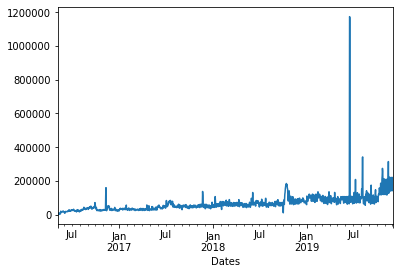

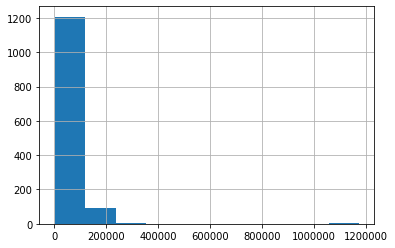

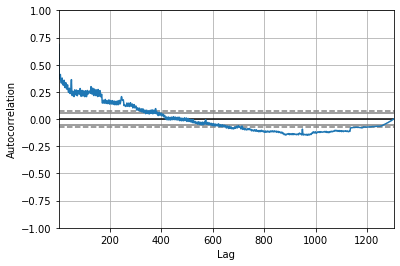

In [47]:
# calculate and plot checking for white noice

# summary statistics
print(series.describe())

# line plot
series.plot()
plt.show()

# histogram plot
series.hist()
plt.show()

# autocorrelation
pd.plotting.autocorrelation_plot(series)
plt.show()

### Random Walk

In [155]:
# checking whether stationary using Augmented Dickey-FUller test
from statsmodels.tsa.stattools import adfuller

value = series.values

#statistical test
result = adfuller(values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: -2.079506
p-value: 0.252835
Critical Values:
	1%: -3.435469
	5%: -2.863801
	10%: -2.567974


In [148]:
# let me try and create a random work



[-1]

### Decomposing Time Series Data